In [1]:
import pandas as pd
raw_data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
raw_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Sleep patterns and their association with various health markers offer valuable insights into overall well-being. In this dataset comprising 374 entries across 13 columns, we aim to uncover correlations between sleep metrics, demographics, occupations, and health indicators. By examining these relationships, we endeavor to identify potential patterns and associations that could inform strategies for improved sleep quality and overall health.

In [3]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Making a security copy of data for manipulation
working_df = raw_data.copy()

In [5]:
#Data dimension
print(working_df.shape)

(374, 13)


The data dimension is: **(374,13)**

In [6]:
# Information
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Quick description of the numeric data

In [7]:
# Quick description of the numeric data
working_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Quick description of the object data

In [8]:
# Quick description of the object data
working_df.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [9]:
numeric_cols = working_df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = working_df.select_dtypes(include=['object']).columns.tolist()
print(numeric_cols)
print(categorical_cols)

['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [10]:
#Just see if theres null values
working_df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

We can see this is a clean DB with no null values

In [11]:
# Unique values of the dataframe
unique_values = {col: working_df[col].unique() for col in working_df.columns if col != 'Person ID'}

for key, value in unique_values.items():
    print(f"{key}: {value}", "\n")

Gender: ['Male' 'Female'] 

Age: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59] 

Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager'] 

Sleep Duration: [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2] 

Quality of Sleep: [6 4 7 5 8 9] 

Physical Activity Level: [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85] 

Stress Level: [6 8 7 4 3 5] 

BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight'] 

Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75'] 

Heart Rate: [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86] 

Daily Steps: [ 4200 10000  3000  3500  8000  4000  4100  6

In [17]:
df_numeric = working_df.drop('Person ID', axis=1)
df_numeric = df_numeric.select_dtypes(include=[np.number])  # Keep only numeric columns
correlation_matrix = df_numeric.corr()
correlation_matrix

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


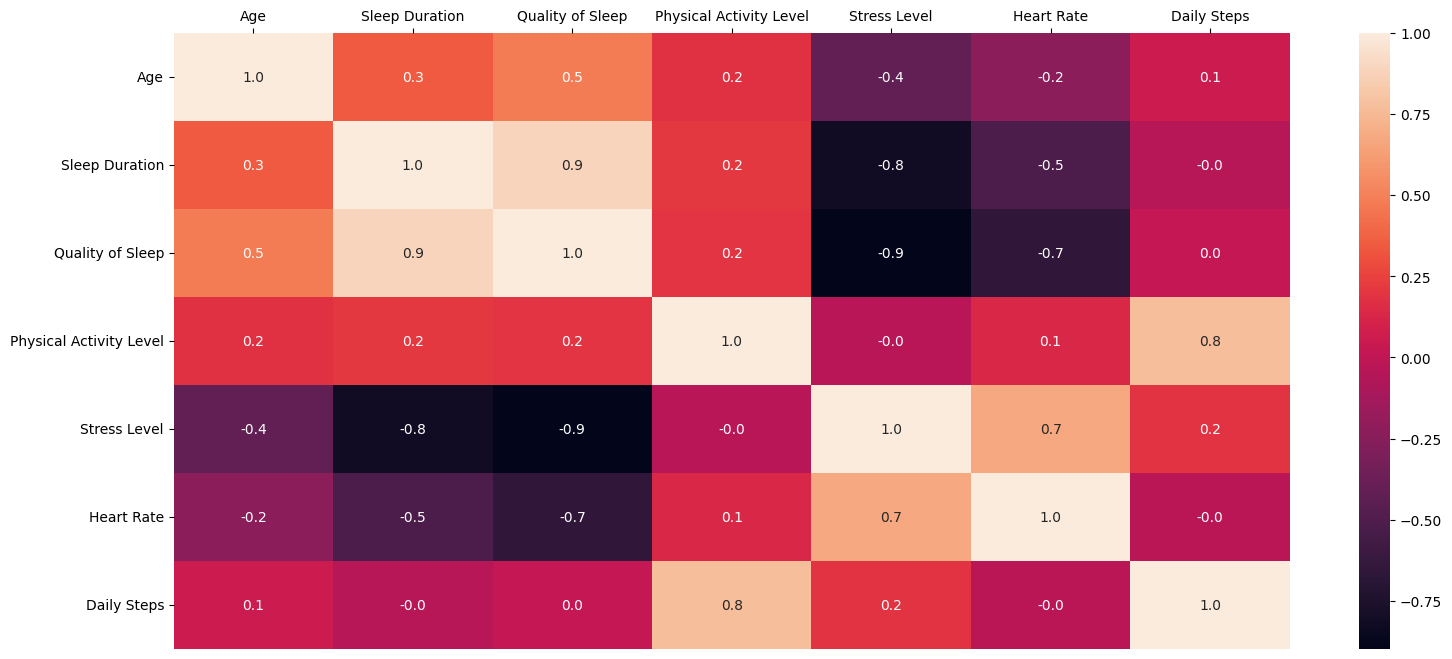

In [18]:
plt.figure(figsize=(18, 8))
numeric_df = working_df.drop('Person ID', axis=1).select_dtypes(include=[np.number])
ax = sns.heatmap(numeric_df.corr(), annot=True, fmt='1.1f')
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

<Figure size 800x400 with 0 Axes>

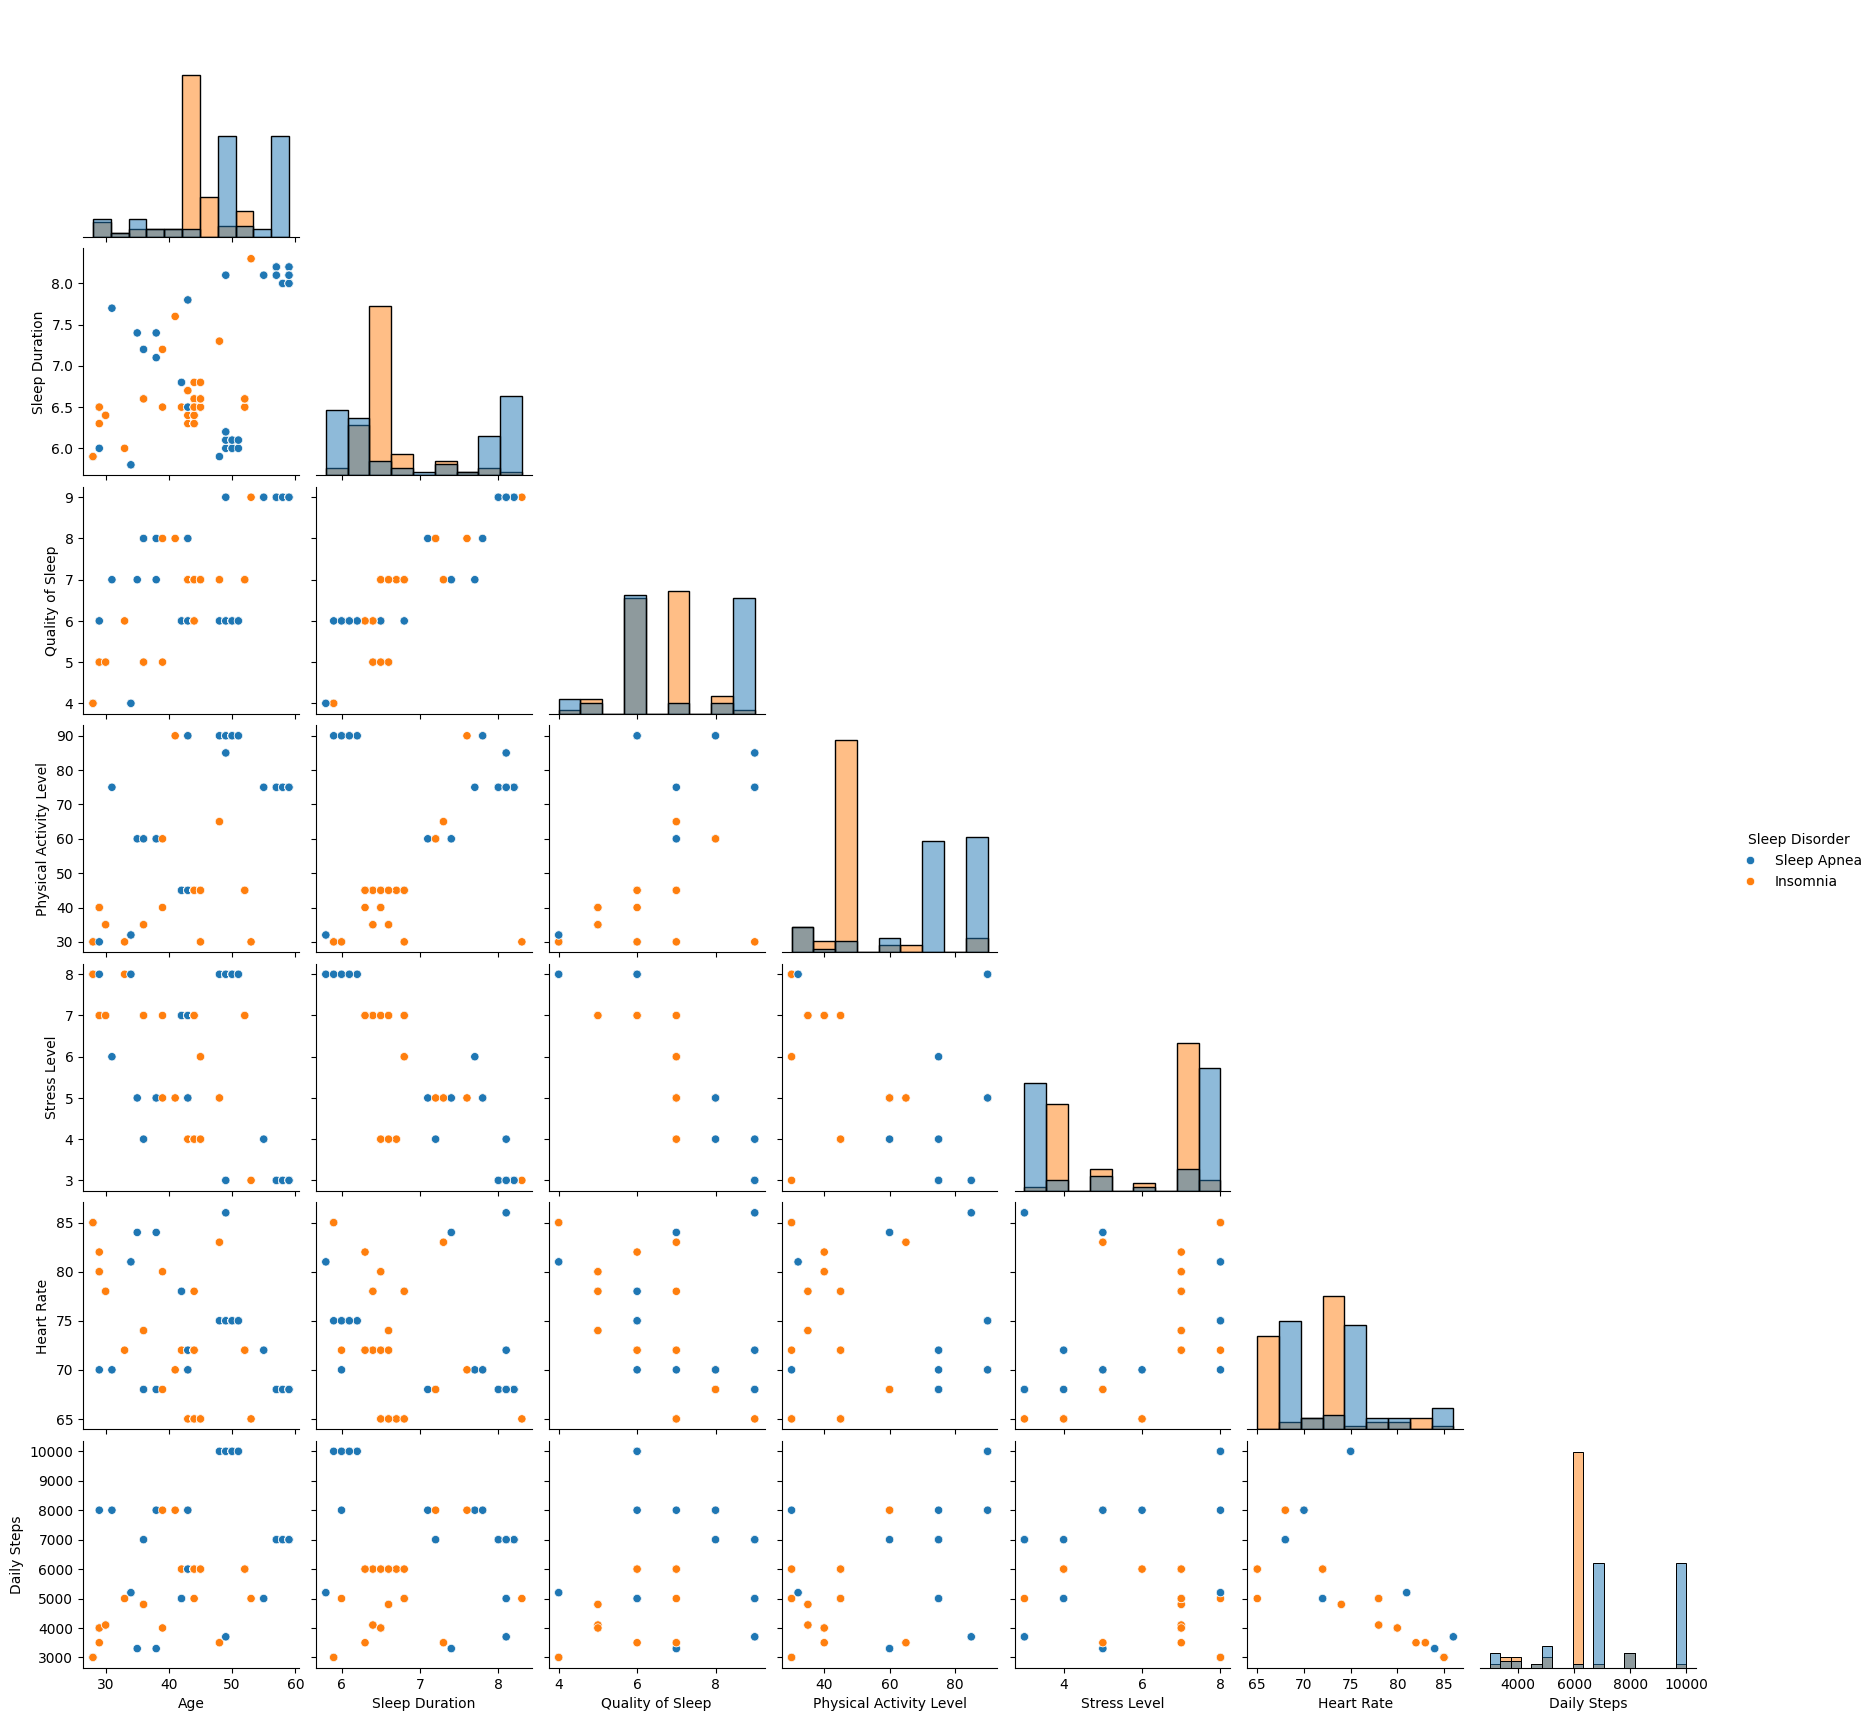

In [15]:
plt.figure(figsize=(8, 4))
sns.pairplot(working_df.drop('Person ID', axis=1), hue='Sleep Disorder', diag_kind="hist", corner=True)
plt.show()
 

<Figure size 1000x600 with 0 Axes>

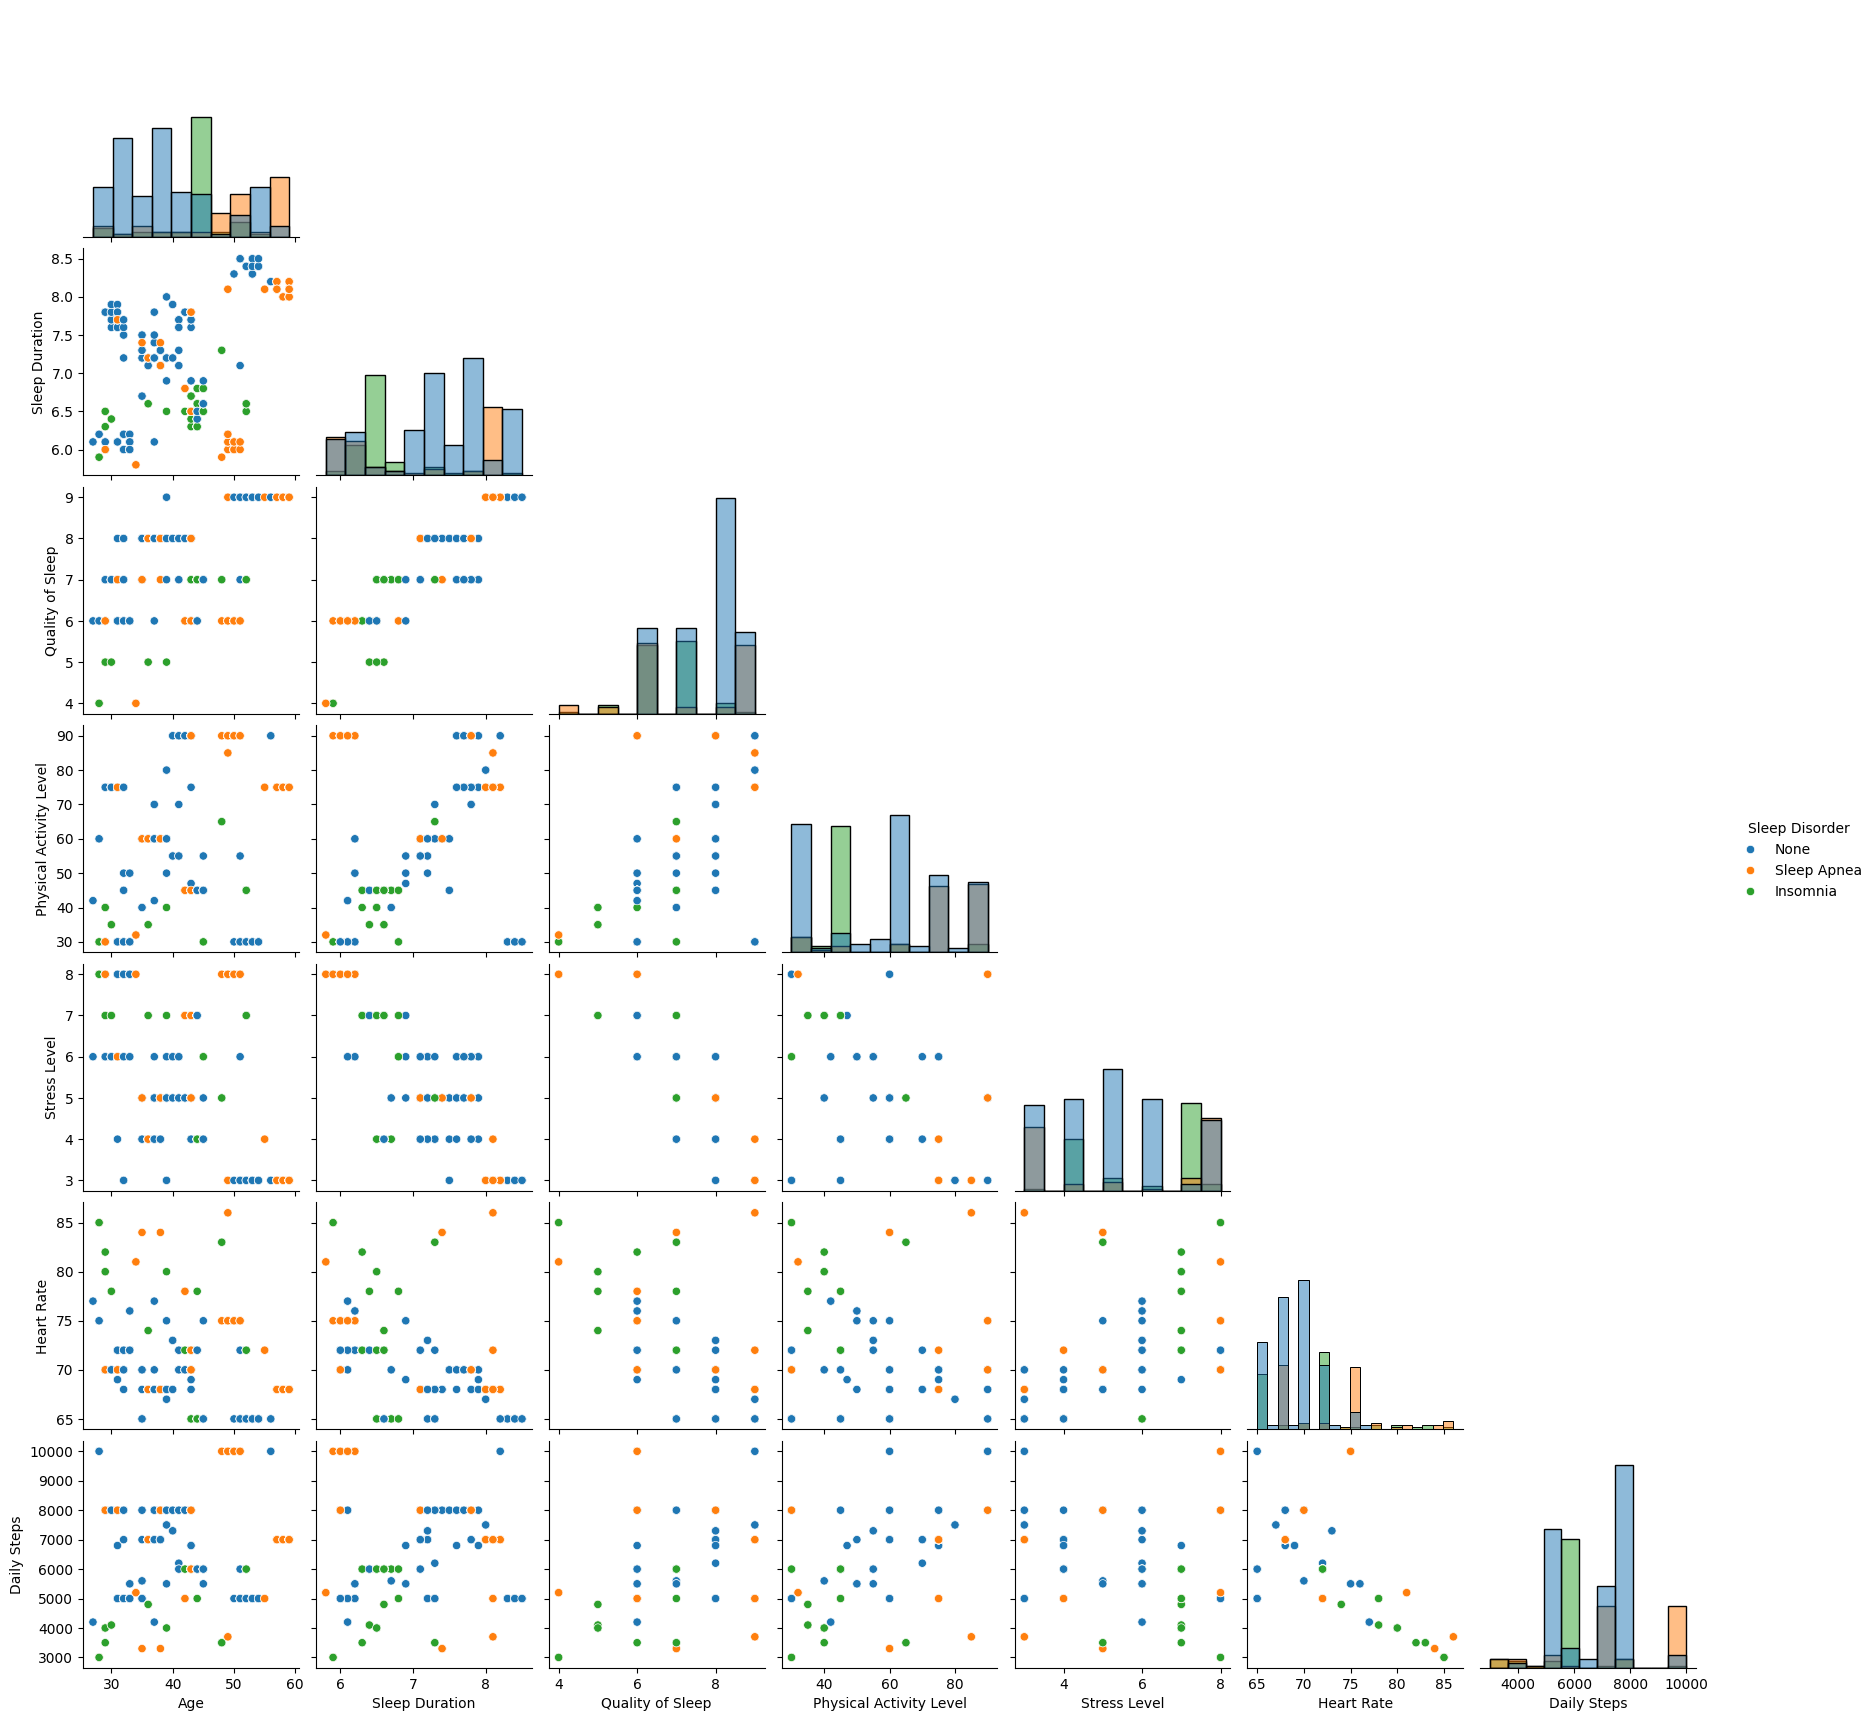

In [13]:
# Pairplot
plt.figure(figsize=(10,6))
sns.pairplot(working_df.drop('Person ID',axis=1),hue='Sleep Disorder',diag_kind="hist", corner=True)
plt.show()

Gender
Male      189
Female    185
Name: count, dtype: int64

Sleep Disorder  Gender
Insomnia        Female    36
                Male      41
Sleep Apnea     Female    67
                Male      11
dtype: int64


C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\2330124728.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(v, i, f' {v} ({percentages[i]:.2f}%)', va='center')


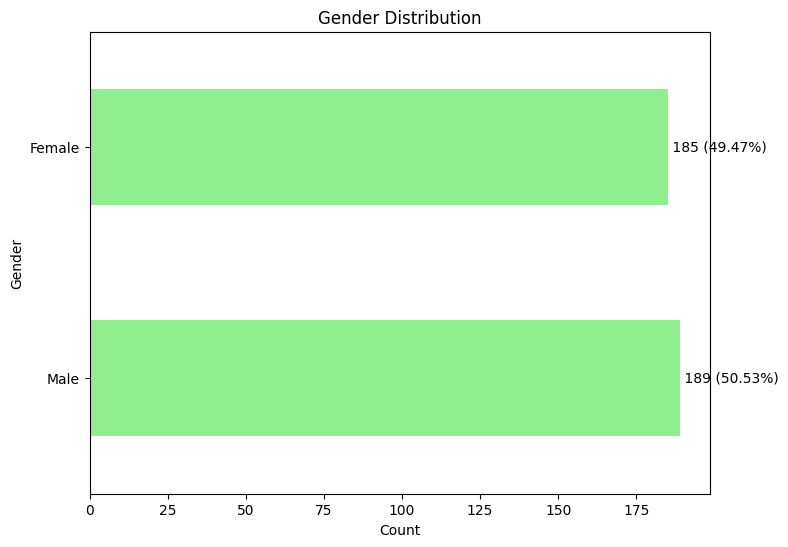

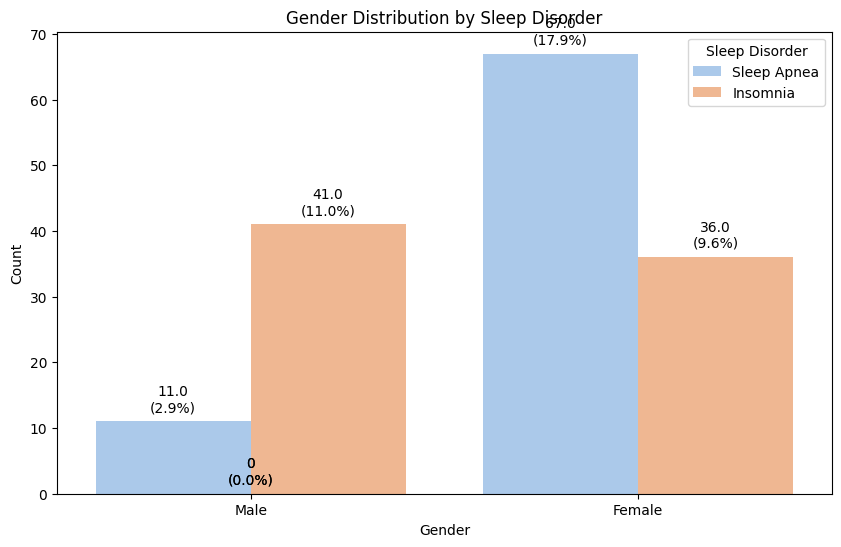

In [19]:
# Gender 
print(working_df['Gender'].value_counts())
print()
print(working_df.groupby(['Sleep Disorder','Gender']).size())

gender_counts = working_df['Gender'].value_counts()
total = gender_counts.sum()
percentages = (gender_counts / total) * 100

# Plotting counts and percentages
plt.figure(figsize=(8, 6))
ax = gender_counts.plot(kind='barh', color='lightgreen')

for i, v in enumerate(gender_counts):
    plt.text(v, i, f' {v} ({percentages[i]:.2f}%)', va='center')

plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.xticks(rotation=0)

# Plotting with seaborn countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=working_df, x='Gender', hue='Sleep Disorder', palette='pastel')
# Calculate counts and percentages
total = len(working_df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}\n({height / total:.1%})',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom')
plt.title('Gender Distribution by Sleep Disorder')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

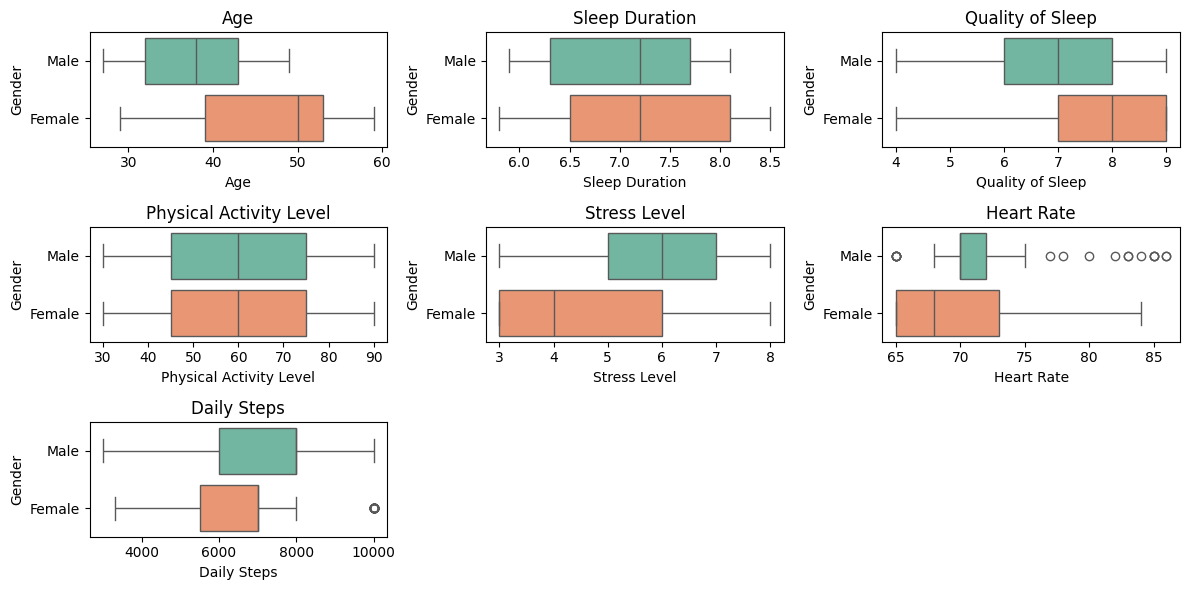

In [24]:
filtered_cols = [col for col in numeric_cols if col != 'Person ID']
gend_df = working_df.drop('Person ID', axis=1)
fig = plt.figure(figsize=(12, 6))
for i in range(len(filtered_cols)):
    plt.subplot(3, 3, i + 1)
    plt.title(filtered_cols[i])
    sns.boxplot(data=gend_df, x=gend_df[filtered_cols[i]], y=gend_df['Gender'], palette='Set2', hue='Gender', legend=False)
plt.tight_layout()
plt.show()


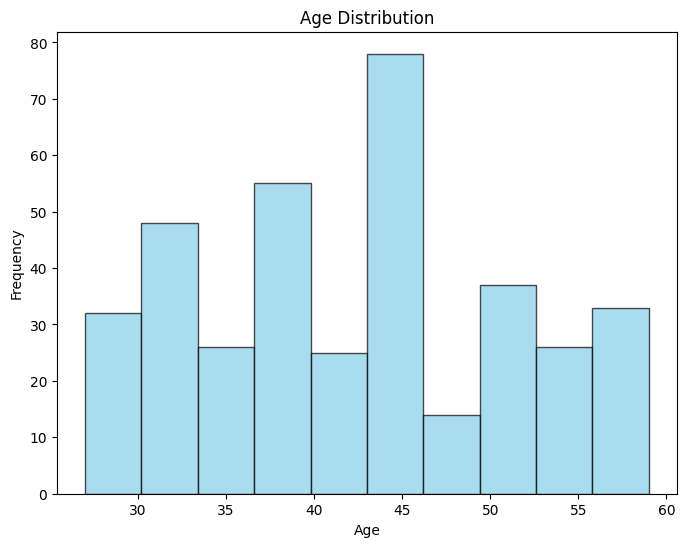

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64


In [25]:
# Age
plt.figure(figsize=(8, 6))
plt.hist(working_df['Age'], bins=10, alpha=0.7, color='skyblue',edgecolor = "black")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

print(working_df['Age'].describe())

Age: Range from 27 to 59 years old, with a mean age of 42 years.

C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\3666318149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=working_df, y='Sleep Disorder', x='Age', palette='Set2', width=.5)


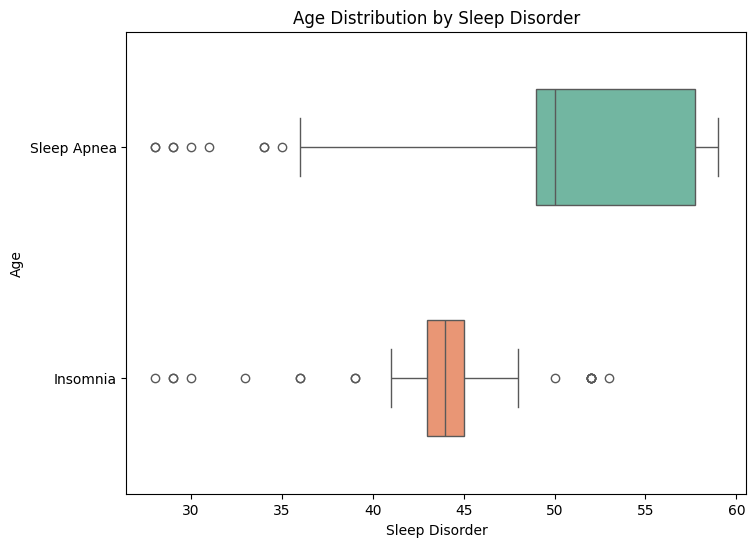

In [26]:
# Age per Sleep Disorder 
plt.figure(figsize=(8, 6))
sns.boxplot(data=working_df, y='Sleep Disorder', x='Age', palette='Set2', width=.5)
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')
plt.title('Age Distribution by Sleep Disorder')
plt.show()

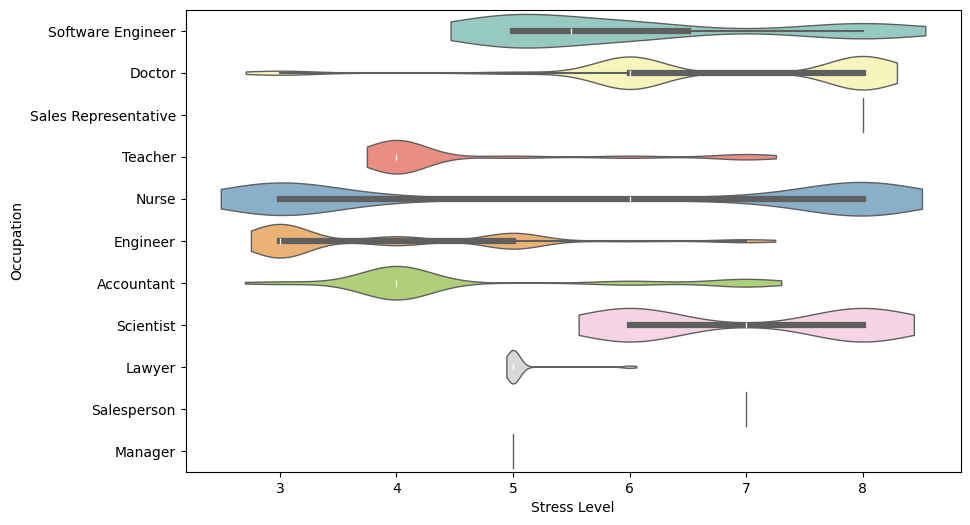

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=working_df, x='Stress Level', y='Occupation', bw_adjust=.5, cut=1, linewidth=1, hue='Occupation', palette='Set3', legend=False)
plt.show()


Boxplot: Stress Level by Occupation

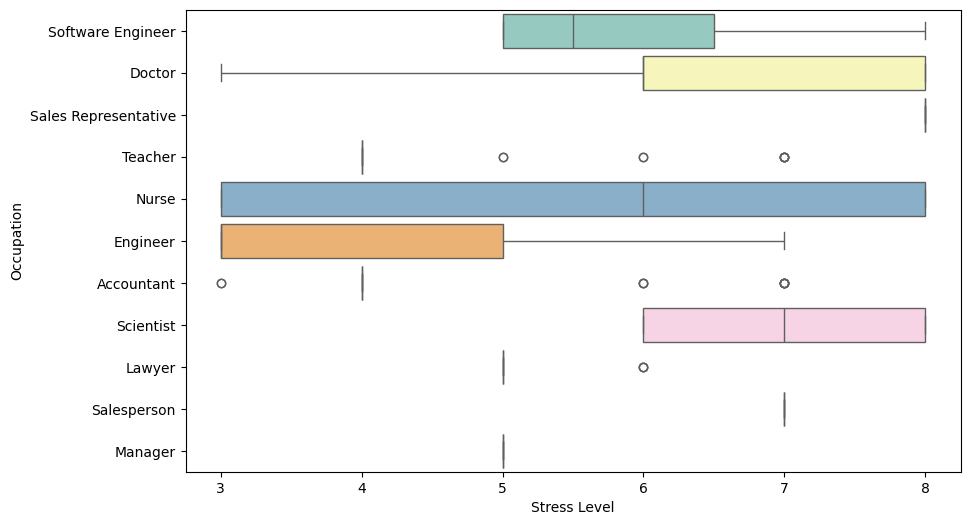

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=working_df, x='Stress Level', y='Occupation', hue='Occupation',palette='Set3')
plt.show()

In [31]:
print(working_df.groupby('Occupation')['Stress Level'].agg(['mean', 'median','std','count']).sort_values(by='count', ascending = False))

                          mean  median       std  count
Occupation                                             
Nurse                 5.547945     6.0  2.392355     73
Doctor                6.732394     6.0  1.372773     71
Engineer              3.888889     3.0  1.137500     63
Lawyer                5.063830     5.0  0.247092     47
Teacher               4.525000     4.0  1.061868     40
Accountant            4.594595     4.0  1.235122     37
Salesperson           7.000000     7.0  0.000000     32
Scientist             7.000000     7.0  1.154701      4
Software Engineer     6.000000     5.5  1.414214      4
Sales Representative  8.000000     8.0  0.000000      2
Manager               5.000000     5.0       NaN      1


In [32]:
# Como los datos estan desbalanceados hacemos un ponderado
occupation_stats = working_df.groupby('Occupation')['Stress Level'].agg(['mean', 'count'])

# Multiplica la media por el tamaño de muestra para cada ocupación
occupation_stats['Weighted Stress'] = occupation_stats['mean'] * occupation_stats['count']

# Encuentra la ocupación con el mayor nivel de estrés ponderado
occupation_highest_stress = occupation_stats['Weighted Stress'].idxmax()

print(f"Occupation with higer stress level: {occupation_highest_stress}")
print(occupation_stats['Weighted Stress'].sort_values(ascending=False))

Occupation with higer stress level: Doctor
Occupation
Doctor                  478.0
Nurse                   405.0
Engineer                245.0
Lawyer                  238.0
Salesperson             224.0
Teacher                 181.0
Accountant              170.0
Scientist                28.0
Software Engineer        24.0
Sales Representative     16.0
Manager                   5.0
Name: Weighted Stress, dtype: float64


An occupation-based analysis underscores that Doctors, Nurses, and Engineers consistently exhibit elevated stress levels within our dataset. Notably, the Sales profession also portrays a substantial stress level, albeit accounting for a smaller segment of the dataset.

### Gender Analysis

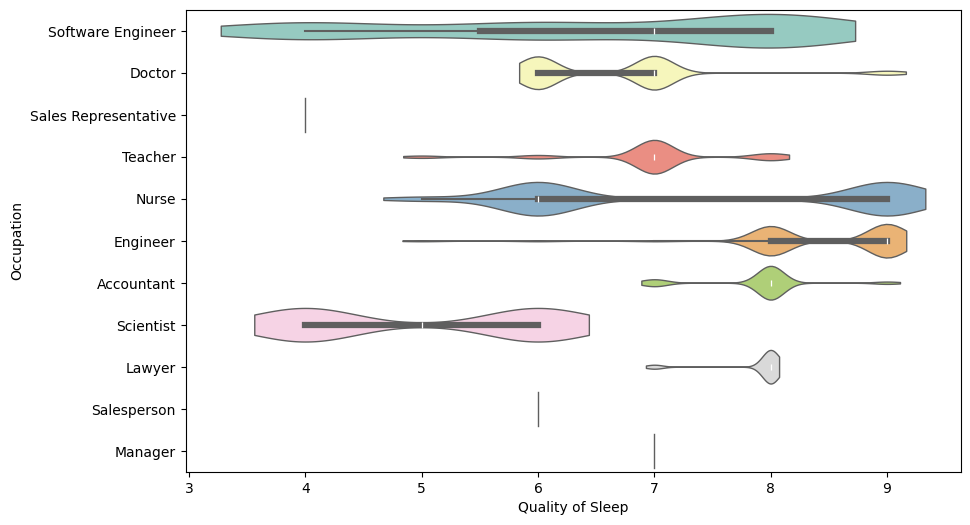

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(data = working_df, x = 'Quality of Sleep', y = 'Occupation', bw_adjust=.5, cut=1, linewidth=1, hue='Occupation',palette="Set3")
plt.show()

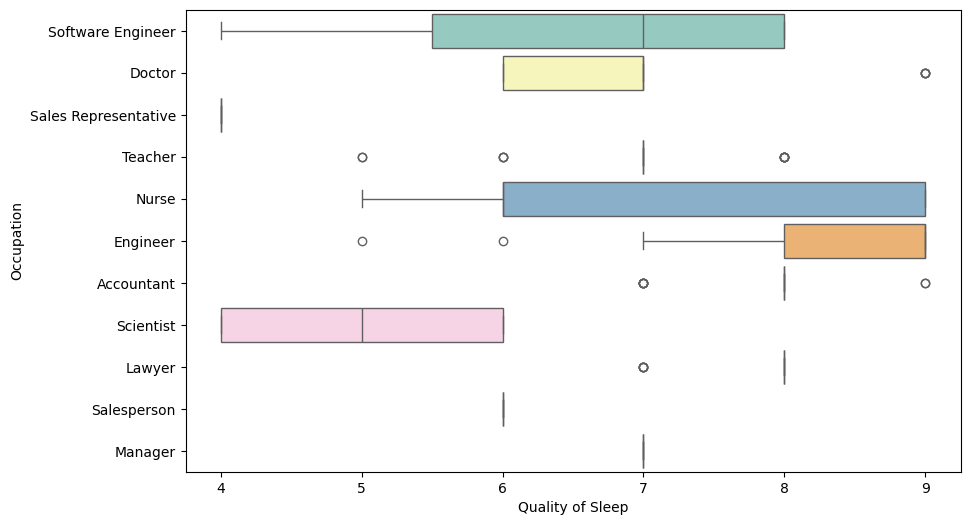

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=working_df, x='Quality of Sleep', y='Occupation',hue='Occupation', palette='Set3')
plt.show()

In [37]:
print(working_df.groupby('Occupation')['Quality of Sleep'].agg(['mean', 'median','std','count']).sort_values(by='mean', ascending = False))

                          mean  median       std  count
Occupation                                             
Engineer              8.412698     9.0  0.754234     63
Lawyer                7.893617     8.0  0.311661     47
Accountant            7.891892     8.0  0.458487     37
Nurse                 7.369863     6.0  1.550151     73
Manager               7.000000     7.0       NaN      1
Teacher               6.975000     7.0  0.659740     40
Doctor                6.647887     7.0  0.757790     71
Software Engineer     6.500000     7.0  1.914854      4
Salesperson           6.000000     6.0  0.000000     32
Scientist             5.000000     5.0  1.154701      4
Sales Representative  4.000000     4.0  0.000000      2


In [38]:
# Como los datos estan desbalanceados hacemos un ponderado
occupation_sleep = working_df.groupby('Occupation')['Quality of Sleep'].agg(['mean', 'count'])

# Multiplica la media por el tamaño de muestra para cada ocupación
occupation_sleep['Weighted Sleep'] = occupation_sleep['mean'] * occupation_sleep['count']

# Encuentra la ocupación con el mayor nivel de estrés ponderado
occupation_highest_sleep = occupation_sleep['Weighted Sleep'].idxmax()

print(f"La ocupación con el mayor nivel de estrés ponderado es: {occupation_highest_sleep}")
print(occupation_sleep['Weighted Sleep'].sort_values(ascending=False))

La ocupación con el mayor nivel de estrés ponderado es: Nurse
Occupation
Nurse                   538.0
Engineer                530.0
Doctor                  472.0
Lawyer                  371.0
Accountant              292.0
Teacher                 279.0
Salesperson             192.0
Software Engineer        26.0
Scientist                20.0
Sales Representative      8.0
Manager                   7.0
Name: Weighted Sleep, dtype: float64


Continuing the occupation analysis, there appears to be an interesting balance within the dataset. Despite their higher stress levels, Nurses, Doctors, and Engineers exhibit better sleep quality, showcasing a nuanced relationship between count and mean values.

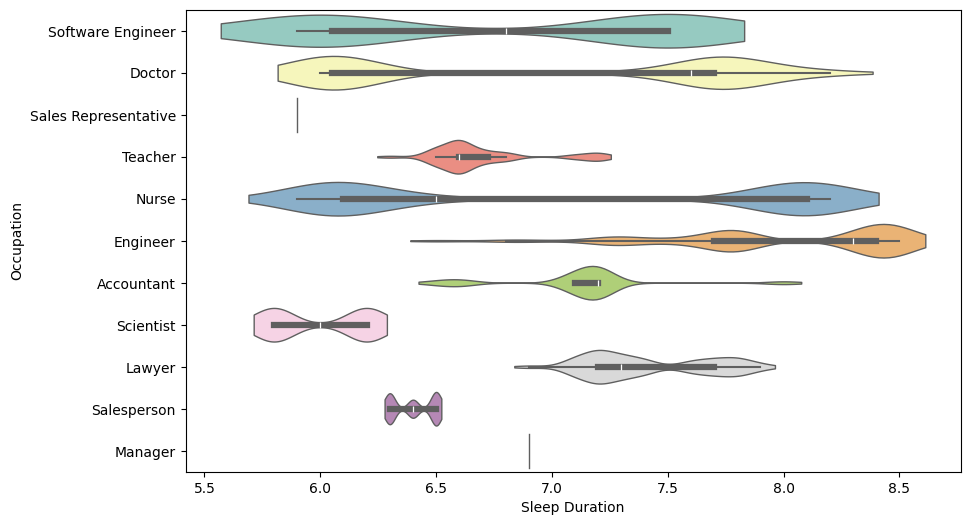

In [40]:
plt.figure(figsize=(10, 6))
sns.violinplot(data = working_df, x = 'Sleep Duration', y = 'Occupation', bw_adjust=.5, cut=1, linewidth=1,hue='Occupation', palette="Set3")
plt.show()

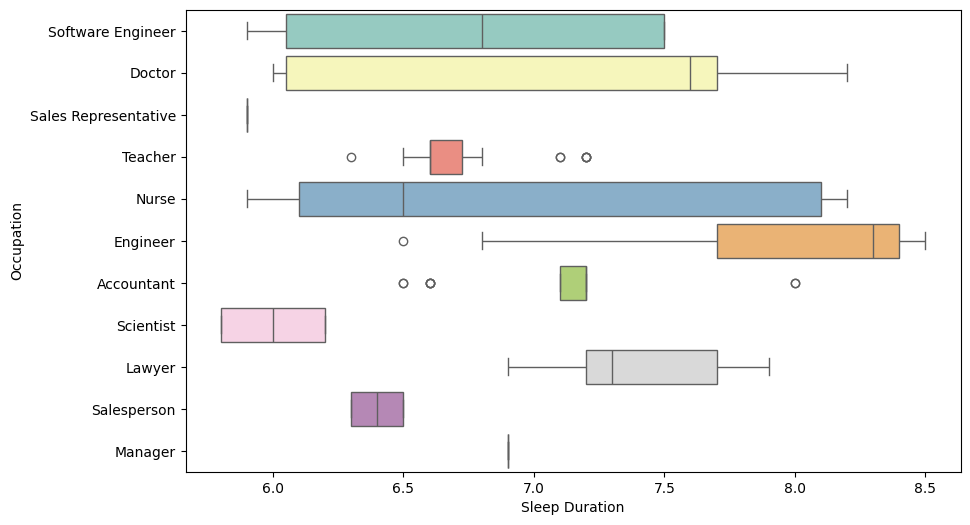

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=working_df, x='Sleep Duration', y='Occupation', hue='Occupation', palette='Set3', legend=False)
plt.show()


In [45]:
print(working_df.groupby('Occupation')['Sleep Duration'].agg(['mean', 'median','std','count']).sort_values(by='mean', ascending = False))

                          mean  median       std  count
Occupation                                             
Engineer              7.987302     8.3  0.511005     63
Lawyer                7.410638     7.3  0.270454     47
Accountant            7.113514     7.2  0.312838     37
Nurse                 7.063014     6.5  0.990301     73
Doctor                6.970423     7.6  0.863613     71
Manager               6.900000     6.9       NaN      1
Software Engineer     6.750000     6.8  0.869866      4
Teacher               6.690000     6.6  0.226229     40
Salesperson           6.403125     6.4  0.089747     32
Scientist             6.000000     6.0  0.230940      4
Sales Representative  5.900000     5.9  0.000000      2


In [46]:
# Como los datos estan desbalanceados hacemos un ponderado
occupation_sleep_d = working_df.groupby('Occupation')['Sleep Duration'].agg(['mean', 'count'])

# Multiplica la media por el tamaño de muestra para cada ocupación
occupation_sleep_d['Weighted Sleep'] = occupation_sleep_d['mean'] * occupation_sleep_d['count']

# Encuentra la ocupación con el mayor nivel de estrés ponderado
occupation_highest_sleep_d = occupation_sleep_d['Weighted Sleep'].idxmax()

print(f"Occupations with higer sleep duration: {occupation_highest_sleep_d}")
print(occupation_sleep_d['Weighted Sleep'].sort_values(ascending=False))

Occupations with higer sleep duration: Nurse
Occupation
Nurse                   515.6
Engineer                503.2
Doctor                  494.9
Lawyer                  348.3
Teacher                 267.6
Accountant              263.2
Salesperson             204.9
Software Engineer        27.0
Scientist                24.0
Sales Representative     11.8
Manager                   6.9
Name: Weighted Sleep, dtype: float64


In [47]:
working_df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [48]:
occupation_data = working_df.groupby('Occupation')[['Quality of Sleep', 'Stress Level', 'Sleep Duration']].agg(['mean', 'count'])
occupation_data['Weighted Data'] = occupation_data[('Quality of Sleep', 'mean')] * occupation_data[('Quality of Sleep', 'count')] +\
                                  occupation_data[('Stress Level', 'mean')] * occupation_data[('Stress Level', 'count')] + \
                                  occupation_data[('Sleep Duration', 'mean')] * occupation_data[('Sleep Duration', 'count')]
occupation_highest_data = occupation_data['Weighted Data'].idxmax()
print(f"La ocupación con el mayor nivel de datos ponderados es: {occupation_highest_data}")
print(occupation_data['Weighted Data'].sort_values(ascending=False))

La ocupación con el mayor nivel de datos ponderados es: Nurse
Occupation
Nurse                   1458.6
Doctor                  1444.9
Engineer                1278.2
Lawyer                   957.3
Teacher                  727.6
Accountant               725.2
Salesperson              620.9
Software Engineer         77.0
Scientist                 72.0
Sales Representative      35.8
Manager                   18.9
Name: Weighted Data, dtype: float64


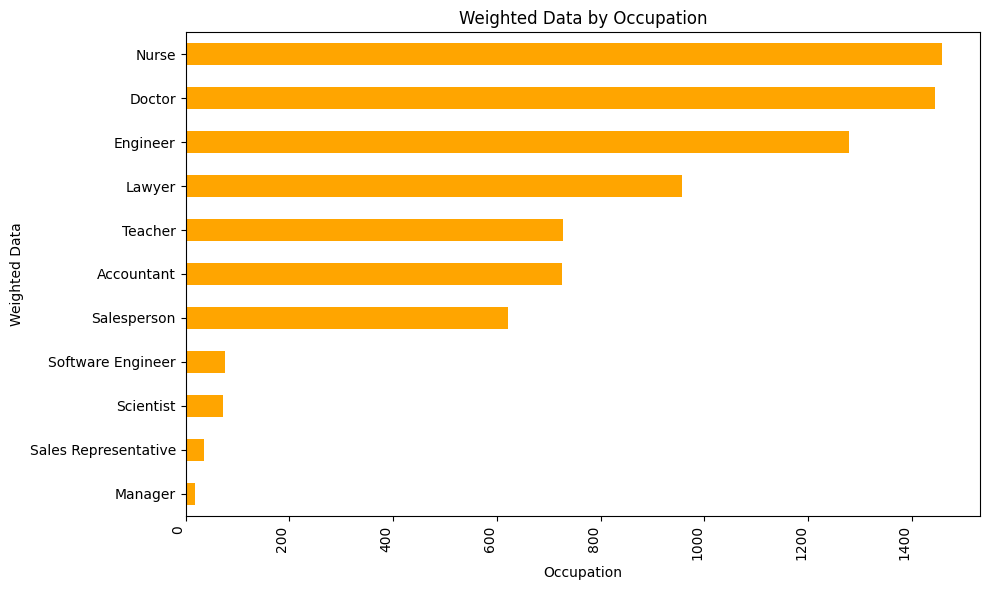

In [49]:
# Sorting the data for plotting
sorted_data = occupation_data['Weighted Data'].sort_values(ascending=True)

# Plotting the weighted data
plt.figure(figsize=(10, 6))
sorted_data.plot(kind='barh', color='orange')
plt.title('Weighted Data by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Weighted Data')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Nurses, Engineers, and Doctors consistently demonstrate better sleep duration within their respective occupations.

**Tendency in Dataset Composition: This trend across these three variables might be influenced by the dataset's composition, reflecting a larger percentage of data within these occupations.**

<Figure size 800x600 with 0 Axes>

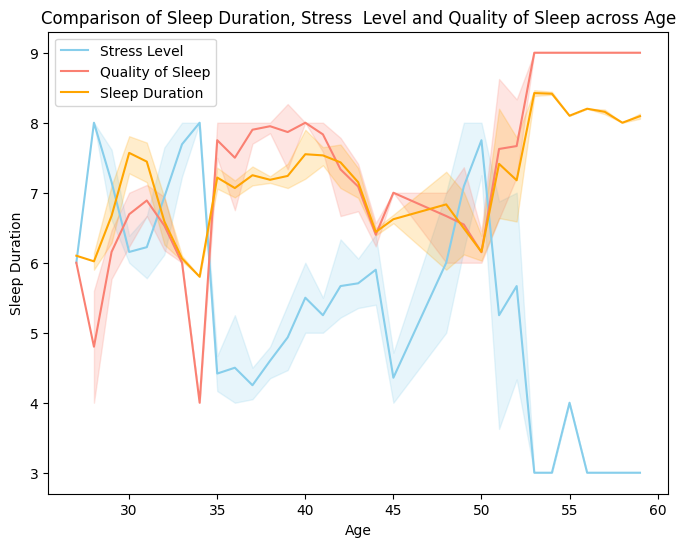

In [50]:
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
sns.lineplot(data=working_df, x='Age', y='Stress Level', label='Stress Level', color='skyblue', markers=True, dashes=False)
sns.lineplot(data=working_df, x='Age', y='Quality of Sleep', label='Quality of Sleep', color='salmon', markers=True, dashes=False)
sns.lineplot(data=working_df, x='Age', y='Sleep Duration',label='Sleep Duration', color='orange', markers=True, dashes=False)
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Comparison of Sleep Duration, Stress  Level and Quality of Sleep across Age')
plt.legend()
plt.show()

The comparison of Sleep Duration, Stress Level, and Quality of Sleep across different age groups reveals compelling trends. Our correlation analysis indicates a decline in Stress Level with age, while both Sleep Quality and Duration exhibit an increase with advancing age. Interestingly, Stress Levels peak in the 50s, while individuals of older age tend to experience better sleep quality, longer duration, and lower stress levels. Notably, the most challenging periods concerning these variables seem to fall within the age range of the 20s to mid-30s.

<Figure size 800x600 with 0 Axes>

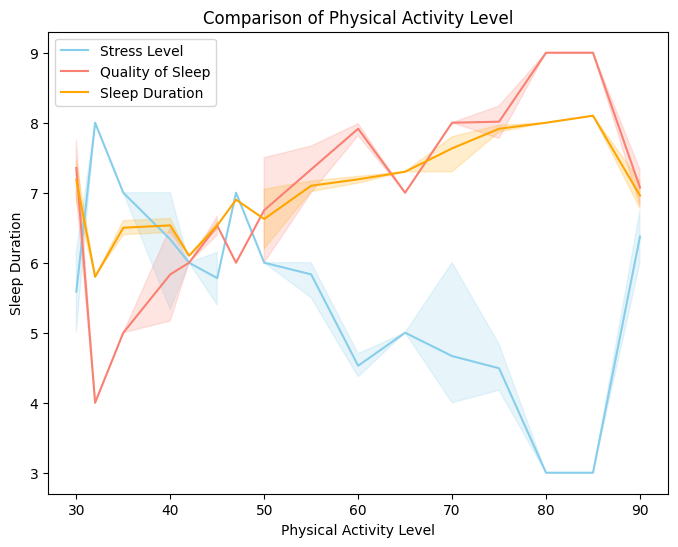

In [51]:
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
sns.lineplot(data=working_df, x='Physical Activity Level', y='Stress Level', label='Stress Level', color='skyblue', markers=True, dashes=False)
sns.lineplot(data=working_df, x='Physical Activity Level', y='Quality of Sleep', label='Quality of Sleep', color='salmon', markers=True, dashes=False)
sns.lineplot(data=working_df, x='Physical Activity Level', y='Sleep Duration',label='Sleep Duration', color='orange', markers=True, dashes=False)
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration')
plt.title('Comparison of Physical Activity Level')
plt.legend()
plt.show()

Upon examining the potential impact of physical activity on sleep, the data suggests a noteworthy correlation: individuals engaging in higher levels of physical activity exhibit lower stress levels and experience better sleep quality and longer sleep duration. This association indicates a potential relationship between increased physical activity and improved sleep metrics, emphasizing the potential benefits of an active lifestyle on sleep health.

C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\202876842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=working_df, x='Physical Activity Level', y='Sleep Disorder', palette='Set2', width=.5)


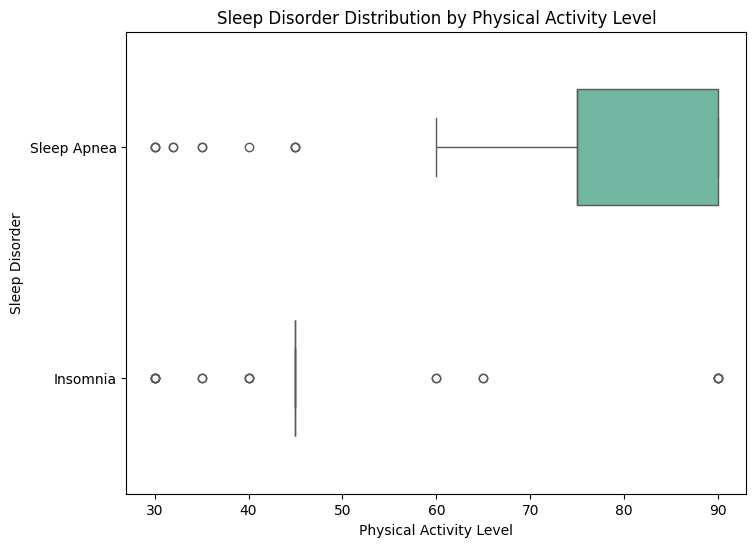

In [52]:
# Age per Sleep Disorder 
plt.figure(figsize=(8, 6))
sns.boxplot(data=working_df, x='Physical Activity Level', y='Sleep Disorder', palette='Set2', width=.5)
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Disorder')
plt.title('Sleep Disorder Distribution by Physical Activity Level')
plt.show()


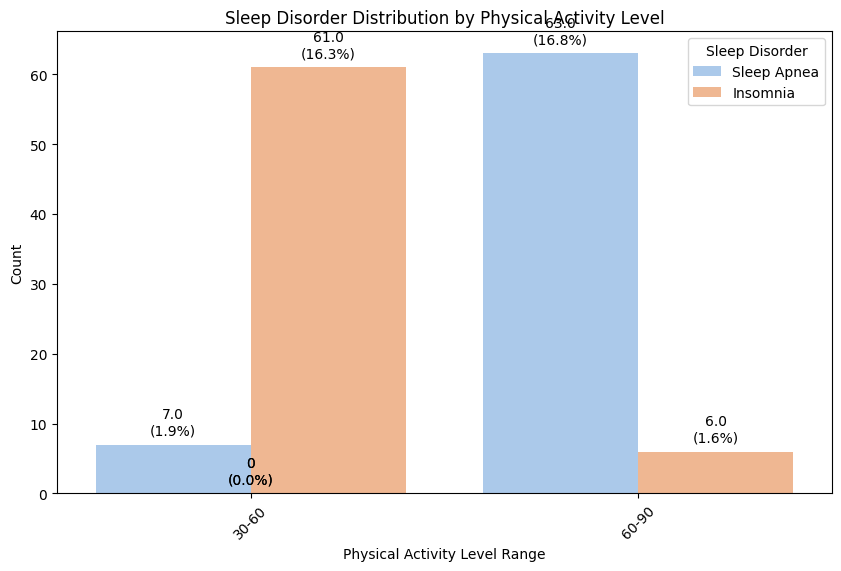

In [53]:
# bin ranges and labels for 'Physical Activity Level'
#bin_ranges = [30, 40, 50, 60, 70, 80, 90] 
#bin_labels = ['30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
bin_ranges = [ 40, 60, 90]
bin_labels = ['30-60', '60-90']

# Create a new column with binned 'Physical Activity Level'
working_df['Activity Range'] = pd.cut(working_df['Physical Activity Level'], bins=bin_ranges, labels=bin_labels)

# Plotting the countplot with ranges on the x-axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=working_df, x='Activity Range', hue='Sleep Disorder', palette='pastel')

# Calculate counts and percentages
total = len(working_df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}\n({height / total:.1%})',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom')

plt.xlabel('Physical Activity Level Range')
plt.ylabel('Count')
plt.title('Sleep Disorder Distribution by Physical Activity Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Sleep Disorder')
plt.show()


Individuals engaging in regular physical activity tend to exhibit a lower prevalence of sleep disorders, notably with a minimal occurrence of none sleep disorders. However, an intriguing observation emerges with a significant number of individuals reporting sleep apnea despite their engagement in physical activities.

C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\4000462588.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gend_df,y=gend_df['BMI Category'],x=gend_df[filtered_cols[i]], palette='Set2')
C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\4000462588.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gend_df,y=gend_df['BMI Category'],x=gend_df[filtered_cols[i]], palette='Set2')
C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\4000462588.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gend_df,y=gend_df['BMI Category'],x=gend_df[

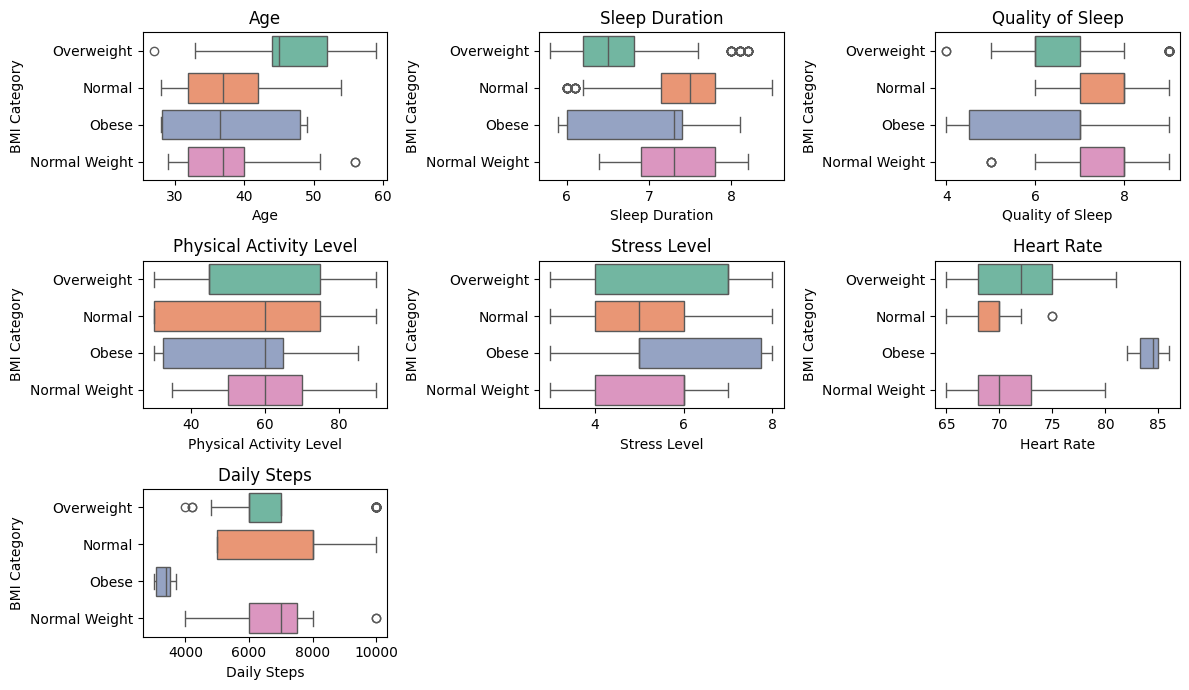

In [54]:
filtered_cols = [col for col in numeric_cols if col != 'Person ID']
gend_df = working_df.drop('Person ID',axis=1)
fig = plt.figure(figsize=(12,7))
for i in range(len(filtered_cols)):
    plt.subplot(3,3,i+1)
    plt.title(filtered_cols[i])
    sns.boxplot(data=gend_df,y=gend_df['BMI Category'],x=gend_df[filtered_cols[i]], palette='Set2')
plt.tight_layout()
plt.show()

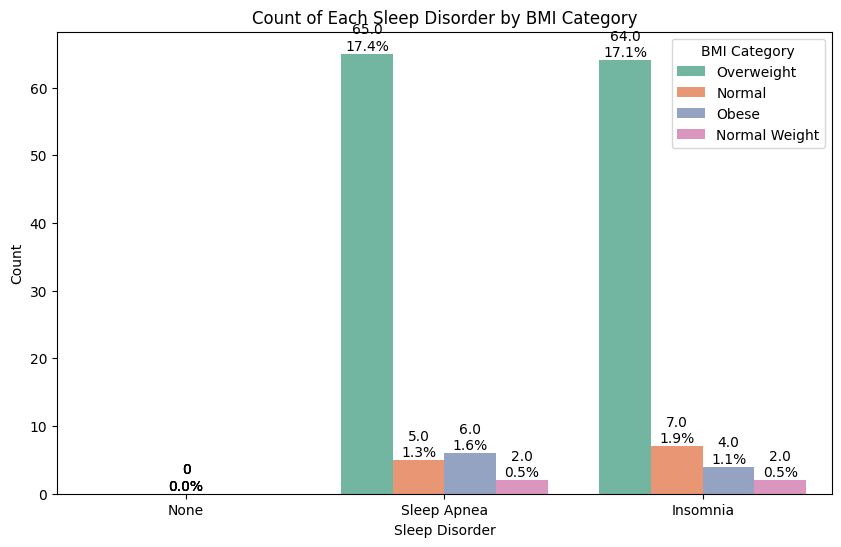

In [55]:
plt.figure(figsize=(10, 6))

sns.countplot(data=working_df, x='Sleep Disorder', hue='BMI Category', order=['None', 'Sleep Apnea', 'Insomnia'],
              palette='Set2')

# Calculate counts and percentages
total = len(working_df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height}\n{height/total:.1%}',
             ha='center', va='bottom')

plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.title('Count of Each Sleep Disorder by BMI Category')
plt.legend(title='BMI Category')
plt.show()

Upon exploring the relationship between weight and sleep disorders, a trend emerges: individuals with a normal weight tend to exhibit a lower likelihood of experiencing none sleep disorders. However, intriguingly, certain factors seem consistent across different weight categories, indicating a potential influence of BMI on sleep disorder occurrences. Particularly notable is the evident association wherein individuals classified as obese tend to encounter more pronounced problems.

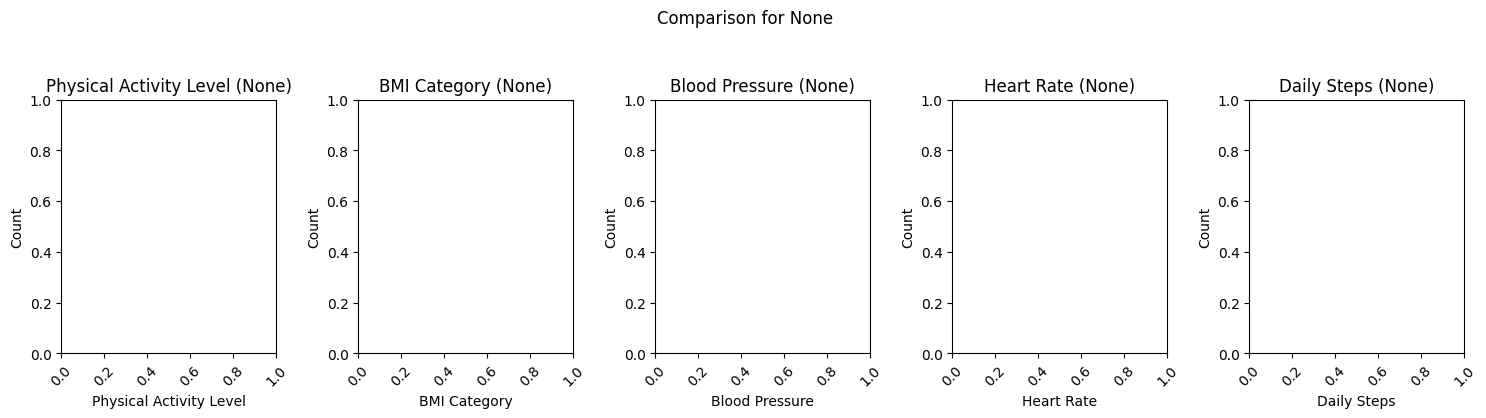

C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\845967764.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=working_df[working_df['Sleep Disorder'] == disorder], x=col, ax=axes[i],palette='Set2')
C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\845967764.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=working_df[working_df['Sleep Disorder'] == disorder], x=col, ax=axes[i],palette='Set2')
C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\845967764.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=working_df[working_d

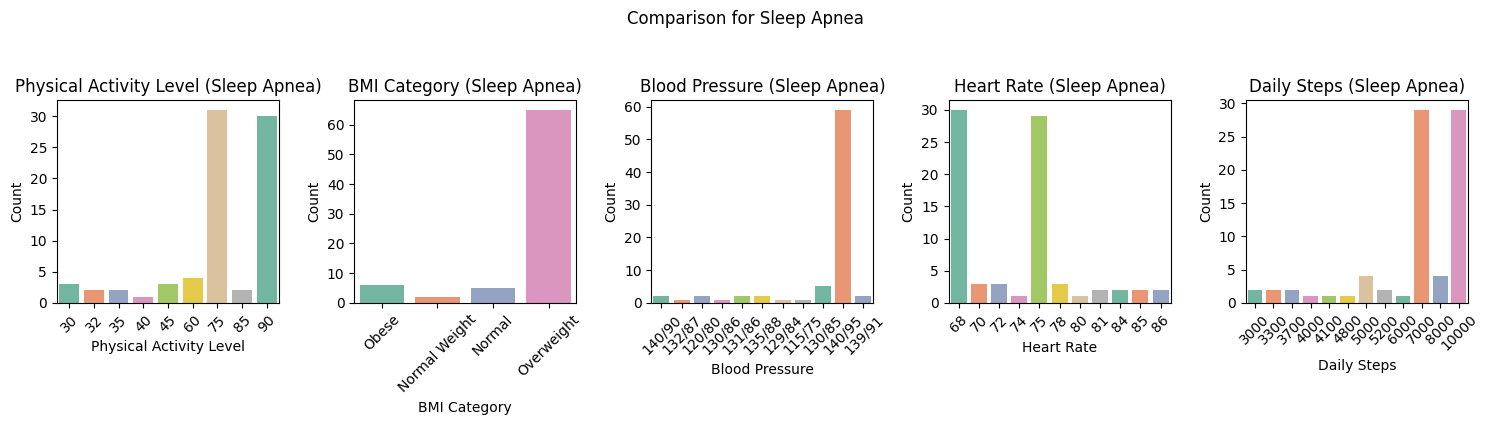

C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\845967764.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=working_df[working_df['Sleep Disorder'] == disorder], x=col, ax=axes[i],palette='Set2')
C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\845967764.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=working_df[working_df['Sleep Disorder'] == disorder], x=col, ax=axes[i],palette='Set2')
C:\Users\Jay\AppData\Local\Temp\ipykernel_8196\845967764.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=working_df[working_d

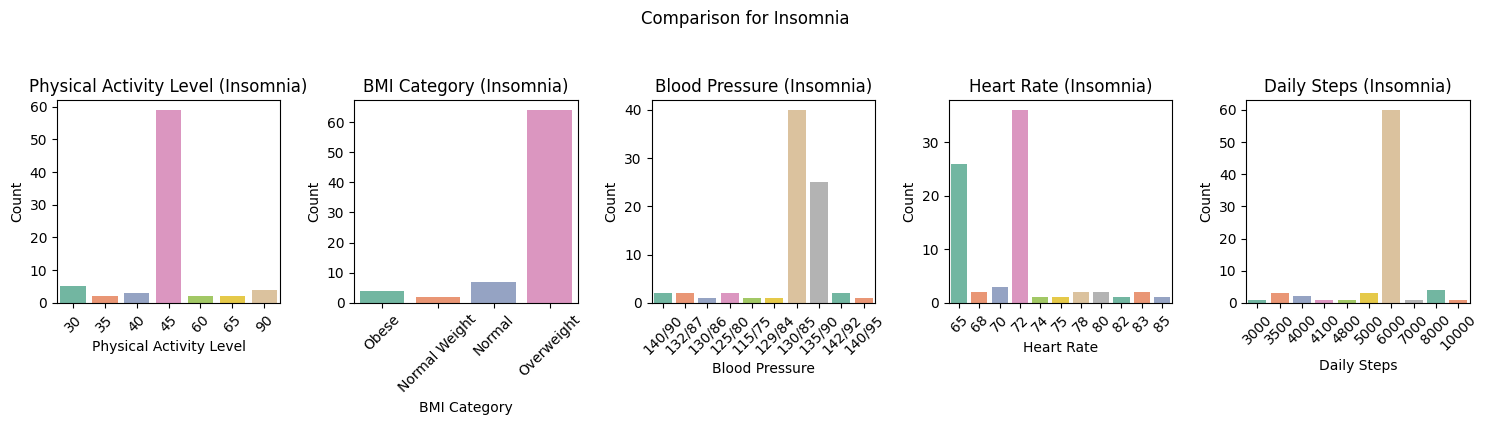

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

activity_cols = ['Physical Activity Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps']
sleep_disorders = ['None', 'Sleep Apnea', 'Insomnia']

for disorder in sleep_disorders:
    fig, axes = plt.subplots(nrows=1, ncols=len(activity_cols), figsize=(15, 4))
    fig.suptitle(f'Comparison for {disorder}', y=1.05)

    for i, col in enumerate(activity_cols):
        sns.countplot(data=working_df[working_df['Sleep Disorder'] == disorder], x=col, ax=axes[i],palette='Set2')
        axes[i].set_title(f'{col} ({disorder})')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


Upon an overall examination of columns in relation to sleep disorders, certain patterns emerge:

Individuals without sleep disorders tend to maintain good levels of physical activity, possess normal weight, and exhibit healthier blood pressure and lower heart rates.

Insomnia appears more prevalent among overweight individuals with lower activity levels and higher blood pressure.

Notably, severe sleep problems such as sleep apnea are observed in individuals across varying activity levels, but predominantly in those categorized as overweight. This suggests that while good physical activity may mitigate the issue, the risk remains higher for those with higher BMI.

### Key Findings and Concluding Remarks
Understanding Sleep Patterns and Health Indicators
Age and Sleep Metrics: Older individuals tend to exhibit longer sleep durations and potentially better sleep quality, marking a positive correlation between age and sleep metrics.

Occupational Trends: Certain professions, notably Doctors, Nurses, and Engineers, consistently display elevated stress levels. Nurses, Engineers, and Doctors also demonstrate better sleep durations within their respective occupations.

Sleep Disorders & Health Indicators: Sleep disorders such as Insomnia and Sleep Apnea show associations with weight, activity levels, and blood pressure. Individuals without sleep disorders maintain better health markers across multiple factors.

### Implications and Recommendations
Understanding these correlations could guide targeted interventions and lifestyle adjustments. Encouraging higher physical activity levels and healthier weights may potentially mitigate the risks associated with sleep disorders. Additionally, workplace strategies to manage stress levels among specific professions could improve overall well-being and sleep quality.



### Additional ML prediction in Sleep Disorder

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'working_df' is your DataFrame and 'Sleep Disorder' is the target variable
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
cat_col = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']




# Extracting features and target
X = working_df[num_col + cat_col].copy()
y = working_df['Sleep Disorder']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Preprocessing for categorical data
label_encoders = {}
for col in cat_col:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Scaling numerical features
scaler = StandardScaler()
X[num_col] = scaler.fit_transform(X[num_col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model Building
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
svc_model = SVC()

# Fit the models
logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Prediction
logistic_pred = logistic_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
svc_pred = svc_model.predict(X_test)

# Evaluation
models = [logistic_model, rf_model, xgb_model, svc_model]
for idx, model in enumerate(models):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Model {idx+1} - Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{matrix}\n")


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.3/99.8 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 0.9/99.8 MB 7.4 MB/s eta 0:00:14
    --------------------------------------- 2.2/99.8 MB 14.0 MB/s eta 0:00:07
   - -------------------------------------- 4.3/99.8 MB 21.2 MB/s eta 0:00:05
   -- ------------------------------------- 6.3/99.8 MB 23.8 MB/s eta 0:00:04
   --- ------------------------------------ 8.3/99.8 MB 26.6 MB/s eta 0:00:04
   ---- ----------------------------------- 10.1/99.8 MB 28.2 MB/s eta 0:00:04
   ---- ----------------------------------- 11.8/99.8 MB 38.6 MB/s eta 0:00:03
   ----- ---------------------------------- 13.9/99.8 MB 38.5 MB/s eta 0:00:03
   ------ --------------------------------- 15.9/99.8 MB 38.5 MB/s eta 0:00:03
   ------ --------------------------------- 17.2/99.8 MB 38.6 MB/s et

C:\Users\Jay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model 1 - Accuracy: 0.9733333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        43

    accuracy                           0.97        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.97      0.97        75

Confusion Matrix:
[[15  1  0]
 [ 1 15  0]
 [ 0  0 43]]

Model 2 - Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.93      0.88      0.90        16
           2       1.00      1.00      1.00        43

    accuracy                           0.96        75
   macro avg       0.94      0.94      0.94        75
weighted avg       0.96      0.96      0.96        75

Confusion Matrix:
[[15  1  0]
 [ 2 14  0]
 [ 0  0 43]]

Model 3 - Accura